# Try features made from image histogram

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os 
import sys

import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns

root_path = os.path.abspath("..")
if root_path not in sys.path:
    sys.path.append(root_path)

In [3]:
from common.dataflow import get_train_df, get_test_df, get_image, get_target, get_inc_angle
from common.dataflow_visu_utils import display_image

train_df = get_train_df()
train_df = train_df.copy()

In [4]:
from common.dataflow import IcebergDataset
norm_b1 = IcebergDataset.norm_b1
norm_b2 = IcebergDataset.norm_b2

from functools import partial

def get_norm_band(b, f=norm_b1):
    return f(np.array(b[0]), b[1]).tolist()

train_df.loc[:, "nband_1"] = train_df[['band_1', 'inc_angle']].apply(partial(get_norm_band, f=norm_b1), axis=1)
train_df.loc[:, "nband_2"] = train_df[['band_2', 'inc_angle']].apply(partial(get_norm_band, f=norm_b2), axis=1)
train_df.loc[:, "nband_3"] = train_df.loc[:, "nband_1"] + train_df.loc[:, "nband_2"] 

In [5]:
train_df.loc[:, 'min_b1'] = train_df['nband_1'].apply(np.min)
train_df.loc[:, 'avg_b1'] = train_df['nband_1'].apply(np.mean)
train_df.loc[:, 'max_b1'] = train_df['nband_1'].apply(np.max)

train_df.loc[:, 'min_b2'] = train_df['nband_2'].apply(np.min)
train_df.loc[:, 'avg_b2'] = train_df['nband_2'].apply(np.mean)
train_df.loc[:, 'max_b2'] = train_df['nband_2'].apply(np.max)

train_df.loc[:, 'min_b3'] = train_df['nband_3'].apply(np.min)
train_df.loc[:, 'avg_b3'] = train_df['nband_3'].apply(np.mean)
train_df.loc[:, 'max_b3'] = train_df['nband_3'].apply(np.max)


train_df.loc[:, '10p_b1'] = train_df['nband_1'].apply(lambda x: np.percentile(x, q=10.0))
train_df.loc[:, '10p_b2'] = train_df['nband_2'].apply(lambda x: np.percentile(x, q=10.0))
train_df.loc[:, '10p_b3'] = train_df['nband_3'].apply(lambda x: np.percentile(x, q=10.0))

In [6]:
def display_min_avg_max(df, title):
    plt.figure(figsize=(18, 4))
    samples = list(range(df.shape[0]))
    plt.subplot(131)
    plt.title(title)
    plt.scatter(df['min_b1'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b1'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b1'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b1'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-30, 20])
    plt.xlabel("b1 min/10%/avg/max values")
    plt.subplot(132)
    plt.scatter(df['min_b2'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b2'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b2'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b2'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-35, 5])
    plt.xlabel("b2 min/10%/avg/max values")
    plt.subplot(133)
    plt.scatter(df['min_b3'], samples, c='b', label='mins', marker='.', s=0.75)
    plt.scatter(df['10p_b3'], samples, c='y', label='10%', marker='.', s=0.75)    
    plt.scatter(df['max_b3'], samples, c='r', label='maxs', marker='.', s=0.75)
    plt.scatter(df['avg_b3'], samples, c='g', label='mean', marker='.', s=0.75)
    plt.xlim([-35, 5])
    plt.xlabel("b3 min/10%/avg/max values")

In [7]:
train_df.loc[:, 'avg_min_b1'] = train_df['avg_b1'] - train_df['min_b1']
train_df.loc[:, 'avg_min_b2'] = train_df['avg_b2'] - train_df['min_b2']
train_df.loc[:, 'avg_min_b3'] = train_df['avg_b3'] - train_df['min_b3']

train_df.loc[:, 'max_avg_b1'] = train_df['max_b1'] - train_df['avg_b1']
train_df.loc[:, 'max_avg_b2'] = train_df['max_b2'] - train_df['avg_b2']
train_df.loc[:, 'max_avg_b3'] = train_df['max_b3'] - train_df['avg_b3']

train_df.loc[:, 'max_min_b1'] = train_df['max_b1'] - train_df['min_b1']
train_df.loc[:, 'max_min_b2'] = train_df['max_b2'] - train_df['min_b2']
train_df.loc[:, 'max_min_b3'] = train_df['max_b3'] - train_df['min_b3']

In [8]:
train_df.loc[:, 'max_b21'] = train_df['max_b2'] - train_df['max_b1']

Display min, avg, max values


In [9]:
train_ships_df = train_df[train_df['is_iceberg'] == 0]
train_icebergs_df = train_df[train_df['is_iceberg'] == 1]

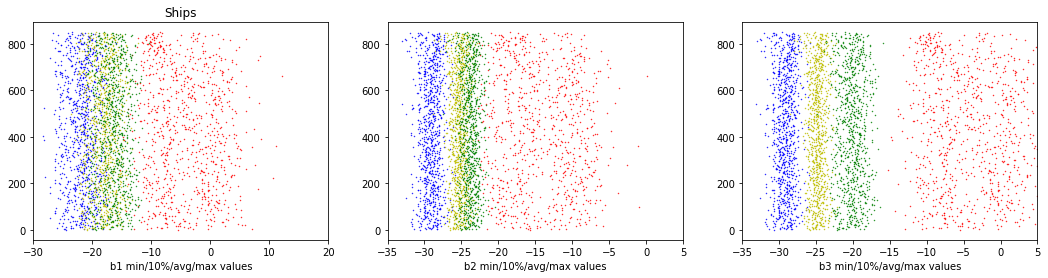

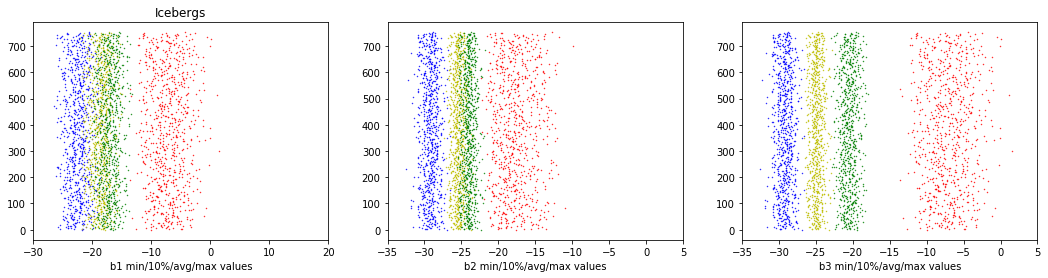

In [10]:
display_min_avg_max(train_ships_df, "Ships")
display_min_avg_max(train_icebergs_df, "Icebergs")

In [11]:
def display_max_avg_distances(df, title):
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    plt.title(title)    
    df['max_avg_b1'].hist(bins=50)
    plt.xlabel("b1 max-avg")
    plt.xlim([0, 30])
    plt.subplot(132)
    df['max_avg_b2'].hist(bins=50)
    plt.xlabel("b2 max-avg")
    plt.xlim([0, 30])    
    plt.subplot(133)
    df['max_avg_b3'].hist(bins=50)    
    plt.xlabel("b3 max-avg")    
    plt.xlim([0, 30])    
    
def display_avg_min_distances(df, title):
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    plt.title(title)    
    df['avg_min_b1'].hist(bins=50)
    plt.xlabel("b1 avg-min")        
    plt.xlim([0, 15])    
    plt.subplot(132)
    df['avg_min_b2'].hist(bins=50)
    plt.xlabel("b2 avg-min")        
    plt.xlim([0, 15])    
    plt.subplot(133)
    df['avg_min_b3'].hist(bins=50)
    plt.xlabel("b3 avg-min") 
    plt.xlim([0, 15])
    
def display_max_min_distances(df, title):
    plt.figure(figsize=(18, 4))
    plt.subplot(131)
    plt.title(title)    
    df['max_min_b1'].hist(bins=50)
    plt.xlabel("b1 max-min")    
    plt.xlim([5, 50])    
    plt.subplot(132)
    df['max_min_b2'].hist(bins=50)
    plt.xlabel("b2 max-min")        
    plt.xlim([5, 50])    
    plt.subplot(133)
    df['max_min_b3'].hist(bins=50)
    plt.xlabel("b3 max-min")     
    plt.xlim([5, 50])    

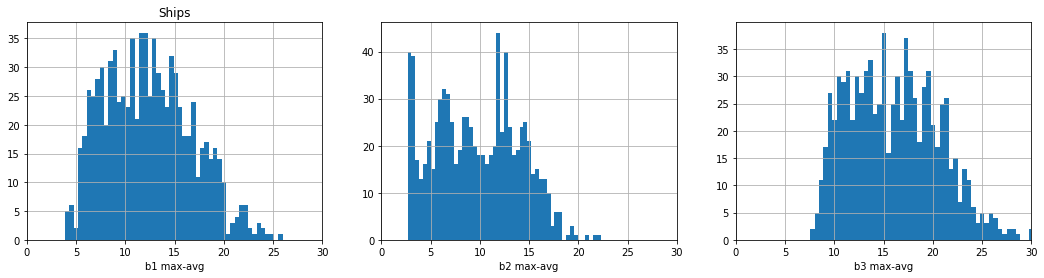

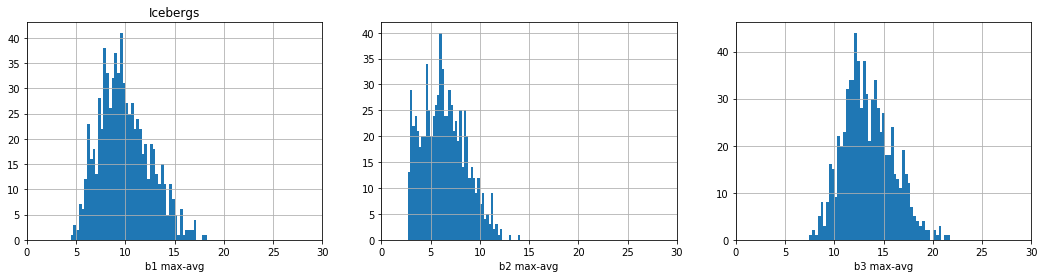

In [12]:
display_max_avg_distances(train_ships_df, "Ships")
display_max_avg_distances(train_icebergs_df, "Icebergs")

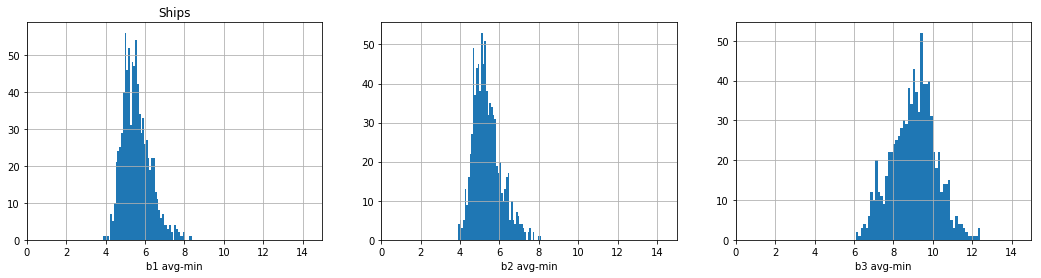

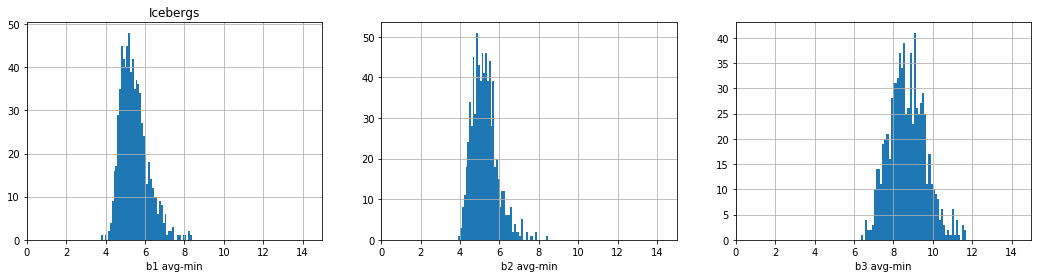

In [13]:
display_avg_min_distances(train_ships_df, "Ships")
display_avg_min_distances(train_icebergs_df, "Icebergs")

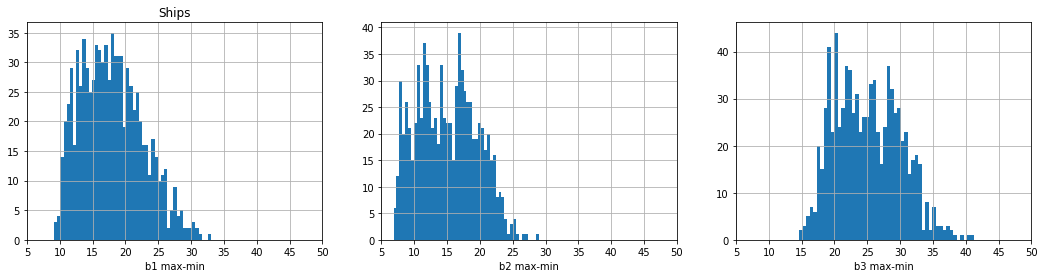

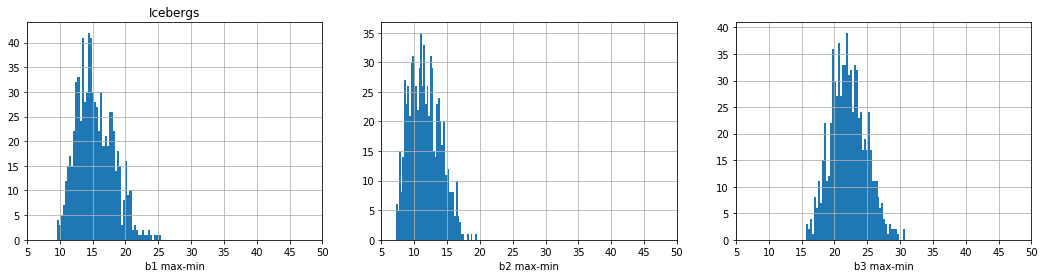

In [14]:
display_max_min_distances(train_ships_df, "Ships")
display_max_min_distances(train_icebergs_df, "Icebergs")

Text(0.5,0,'b21 max')

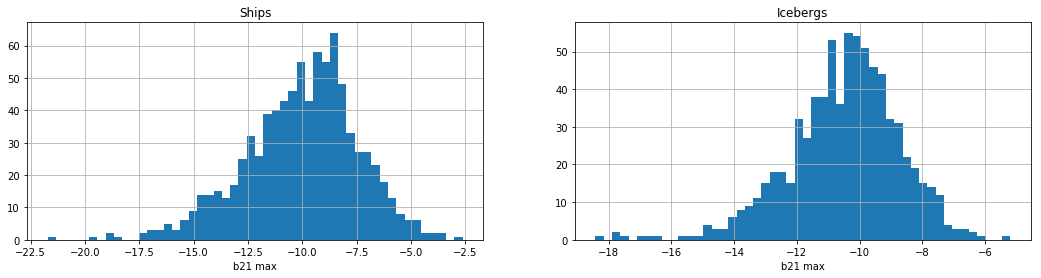

In [15]:
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title("Ships")
train_ships_df['max_b21'].hist(bins=50)
plt.xlabel("b21 max")
plt.subplot(122)
plt.title("Icebergs")
train_icebergs_df['max_b21'].hist(bins=50)
plt.xlabel("b21 max")

Incidence angle

Text(0.5,0,'incidence angle')

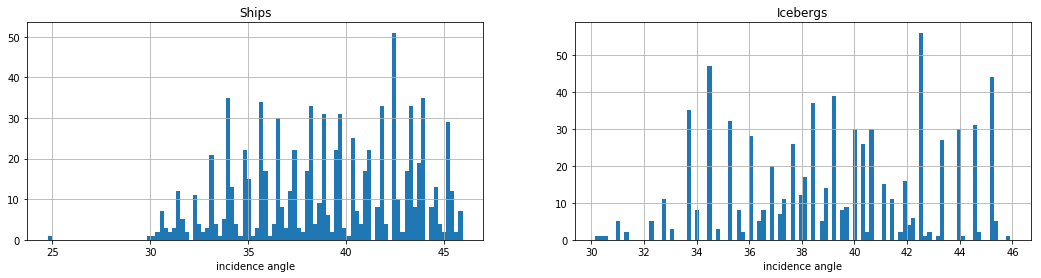

In [16]:
plt.figure(figsize=(18, 4))
plt.subplot(121)
plt.title("Ships")    
train_ships_df['inc_angle'].hist(bins=100)
plt.xlabel("incidence angle")      
plt.subplot(122)
plt.title("Icebergs")    
train_icebergs_df['inc_angle'].hist(bins=100)
plt.xlabel("incidence angle")

Incidence angle vs max value

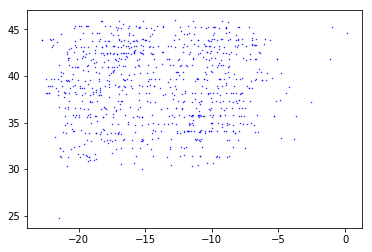

In [22]:
plt.scatter(train_ships_df['max_b2'], train_ships_df['inc_angle'], c='b', marker='.', s=0.75)

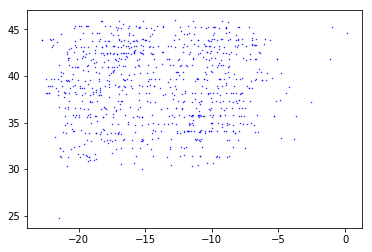

In [22]:
plt.scatter(train_ships_df['max_b2'], train_ships_df['inc_angle'], c='b', marker='.', s=0.75)

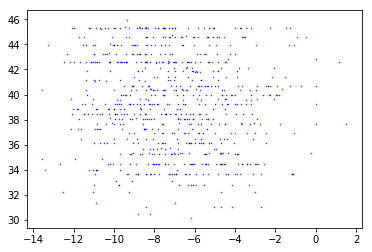

In [35]:
plt.scatter(train_icebergs_df['max_b3'], train_icebergs_df['inc_angle'], c='b', marker='.', s=0.75)

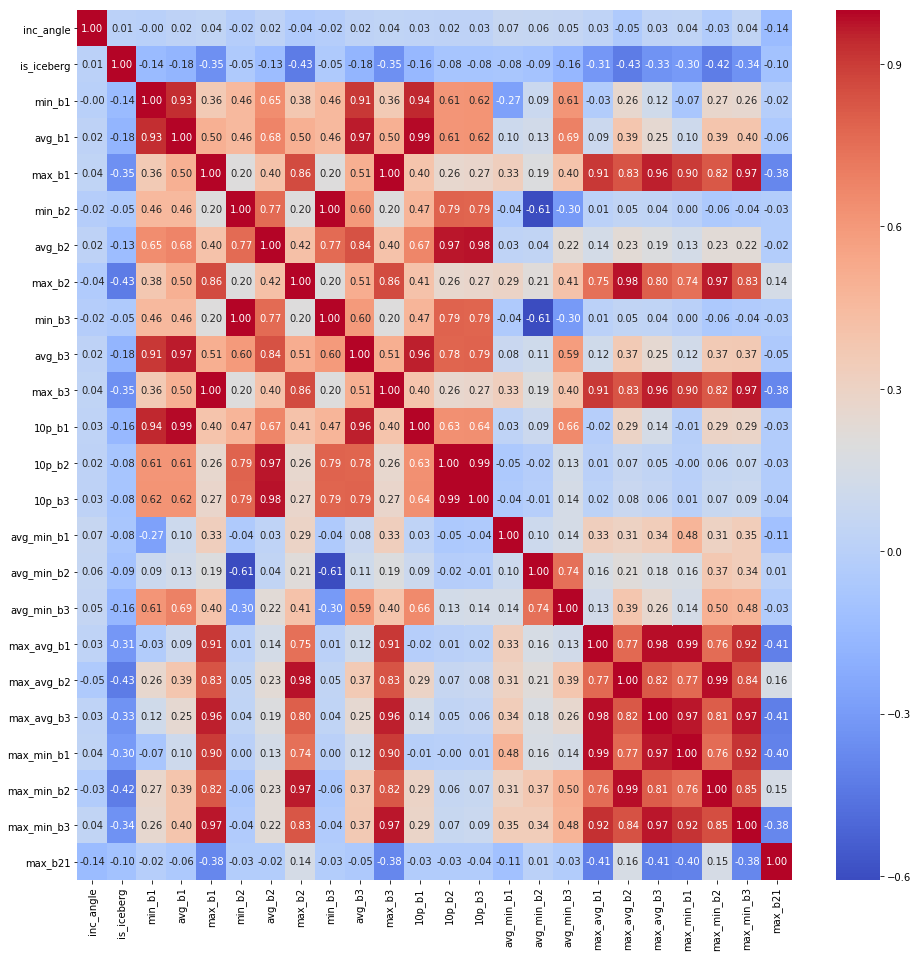

In [15]:
plt.figure(figsize=(16,16))
g = sns.heatmap(train_df.corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [17]:
train_df.columns

Index(['band_1', 'band_2', 'id', 'inc_angle', 'is_iceberg', 'nband_1',
       'nband_2', 'nband_3', 'min_b1', 'avg_b1', 'max_b1', 'min_b2', 'avg_b2',
       'max_b2', 'min_b3', 'avg_b3', 'max_b3', '10p_b1', '10p_b2', '10p_b3',
       'avg_min_b1', 'avg_min_b2', 'avg_min_b3', 'max_avg_b1', 'max_avg_b2',
       'max_avg_b3', 'max_min_b1', 'max_min_b2', 'max_min_b3', 'max_b21'],
      dtype='object')

In [21]:
useful_features = [
    'inc_angle',
    'avg_b1', 'max_b1', 'avg_b2', 'max_b2', 
    'avg_min_b3', 'max_avg_b2', 'max_avg_b3', 'max_min_b2', 'max_min_b3', 
    'max_b21'
]

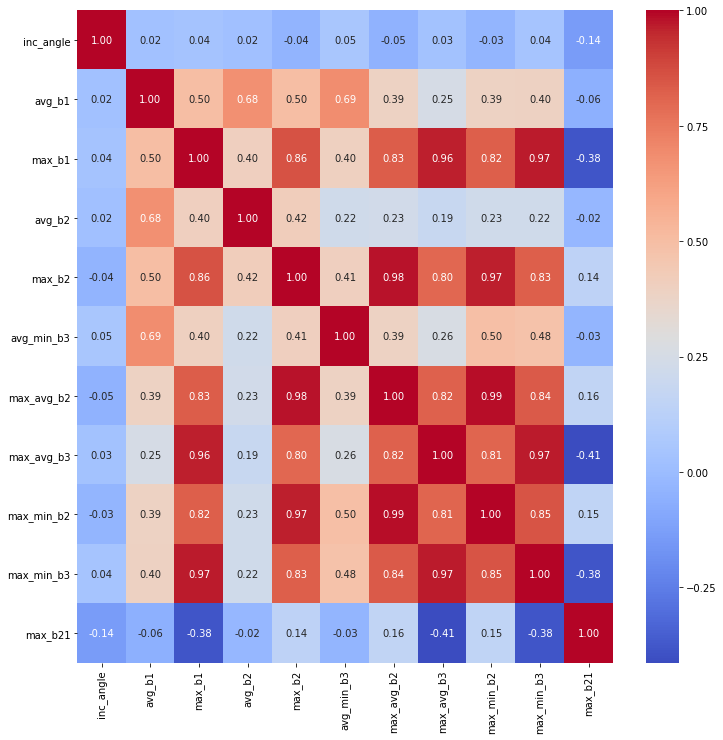

In [22]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[useful_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

Features of bright object

In [23]:
from common.imgproc_utils import *

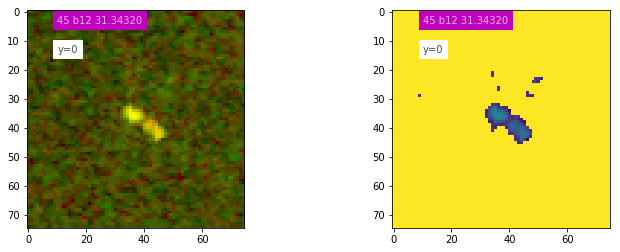

In [24]:
index = train_df.index[45]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
display_image(ax, img, index, 'b12', a, target=y)
ax = plt.subplot(122)
display_image(ax, segment_object(img) * img[:, :, 1], index, 'b12', a, target=y)

In [25]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
    segm_img = img.copy()
    mask = segment_object(img)
    segm_img[:, :, 0] = segm_img[:, :, 0] * mask / 255.0
    segm_img[:, :, 1] = segm_img[:, :, 1] * mask / 255.0
    segm_b1 = segm_img[:, :, 0][segm_img[:, :, 0] < 0.0]
    segm_b2 = segm_img[:, :, 1][segm_img[:, :, 1] < 0.0]
    train_df.loc[i, 'obj_min_b1'] = segm_img[:, :, 0].min()
    train_df.loc[i, 'obj_max_b1'] = segm_b1.max()
    train_df.loc[i, 'obj_avg_b1'] = segm_b1.mean()
    train_df.loc[i, 'obj_min_b2'] = segm_img[:, :, 1].min()
    train_df.loc[i, 'obj_max_b2'] = segm_b2.max() 
    train_df.loc[i, 'obj_avg_b2'] = segm_b2.mean()    

In [26]:
train_df.loc[:, 'obj_avg_b21'] = train_df['obj_avg_b2'] - train_df['obj_avg_b1']
train_df.loc[:, 'obj_min_b21'] = train_df['obj_min_b2'] - train_df['obj_min_b1']
train_df.loc[:, 'obj_max_b21'] = train_df['obj_max_b2'] - train_df['obj_max_b1']

In [29]:
train_df.loc[:, 'obj_max_min_b1'] = train_df['obj_max_b1'] - train_df['obj_min_b1']
train_df.loc[:, 'obj_max_min_b2'] = train_df['obj_max_b2'] - train_df['obj_min_b2']

In [30]:
new_features = [
    'obj_max_min_b1', 'obj_max_min_b2'
]

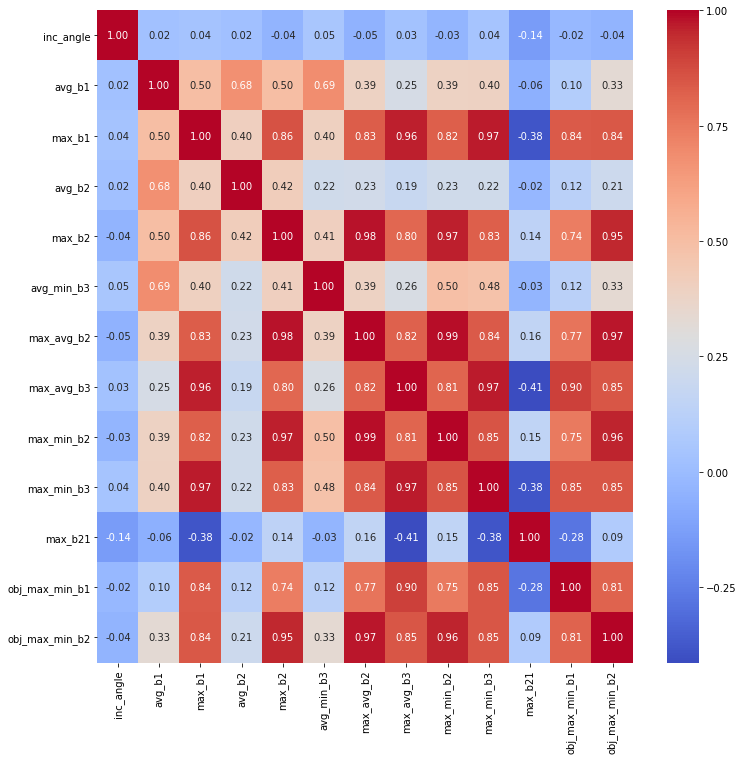

In [31]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[useful_features + new_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [32]:
useful_features = [
    'inc_angle',
    'avg_b1', 'max_b1', 'avg_b2', 'max_b2', 
    'avg_min_b3', 'max_avg_b3', 'max_min_b3', 
    'max_b21'
]

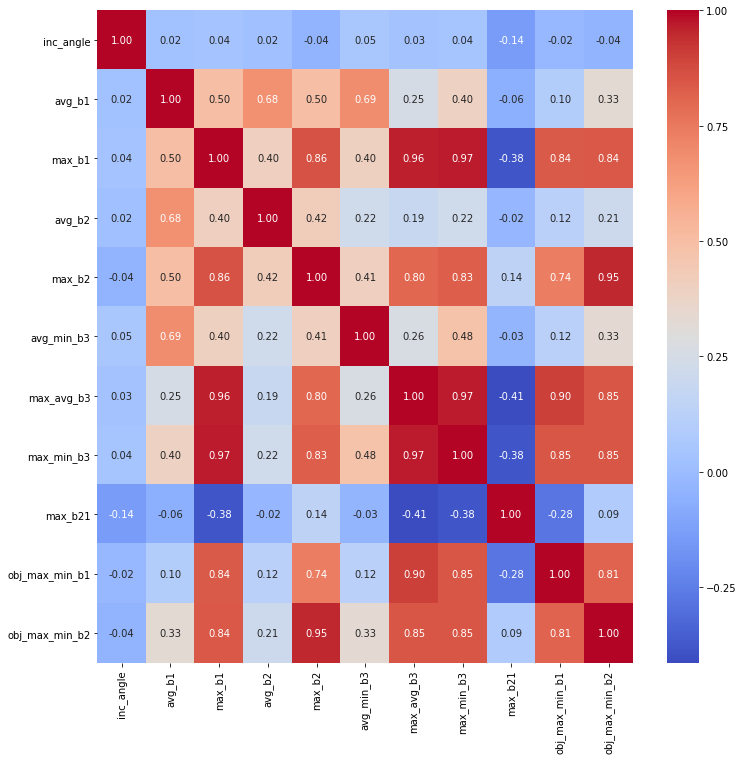

In [33]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[useful_features + new_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

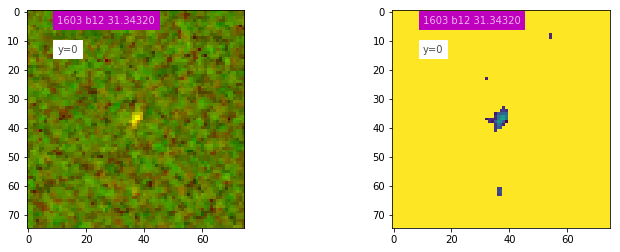

In [34]:
plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
display_image(ax, img, index, 'b12', a, target=y)
ax = plt.subplot(122)
display_image(ax, segment_object(img) * img[:, :, 0], index, 'b12', a, target=y)

Segmented object size 

In [35]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
    obj_size = object_size(img)
    train_df.loc[i, 'obj_size'] = obj_size

In [36]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])

    mask = morpho_close(segment_object(img), ksize=3)
    _, contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour = contours[np.argmax([len(c) for c in contours])]

    defects = cv2.convexityDefects(biggest_contour,
                                   cv2.convexHull(biggest_contour, returnPoints=False))
    if defects is not None:
        defects = (np.min(defects[:,0,-1]), np.max(defects[:,0,-1]), np.mean(defects[:,0,-1]), len(defects[:,0,-1]))
    else:
        defects = (0, 0, 0, 0)
    train_df.loc[i, 'obj_length'] = cv2.arcLength(biggest_contour, closed=True)
    train_df.loc[i, 'obj_area'] = cv2.contourArea(biggest_contour)    
    train_df.loc[i, 'obj_cnvx_def_min'] = defects[0]
    train_df.loc[i, 'obj_cnvx_def_max'] = defects[1]
    train_df.loc[i, 'obj_cnvx_def_mean'] = defects[2]
    train_df.loc[i, 'obj_n_cnvx_def'] = defects[3]

In [37]:
train_df.loc[:, 'obj_f1'] = (train_df['obj_length'] * train_df['obj_length']) / (train_df['obj_area'] + 1e-10)

In [38]:
new_features = [
    'obj_f1', 'obj_size', 'obj_area',
    'obj_cnvx_def_min', 'obj_cnvx_def_mean','obj_cnvx_def_max', 'obj_n_cnvx_def'    
]

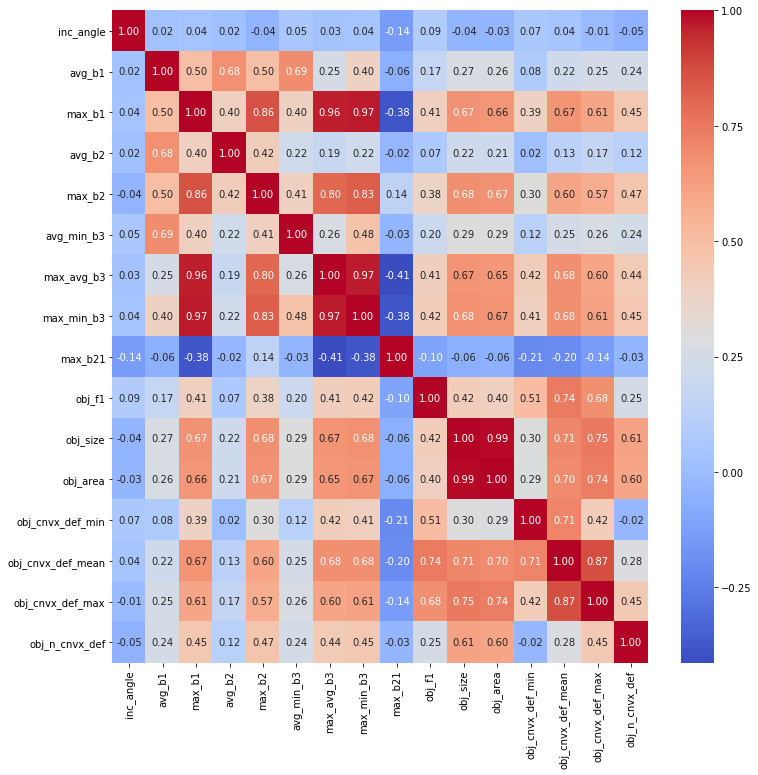

In [39]:
plt.figure(figsize=(12, 12))
g = sns.heatmap(train_df[useful_features + new_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [46]:
useful_features = [
    'inc_angle', 'avg_b1', 'max_b1', 'avg_b2', 'max_b2', 
    'avg_min_b3', 'max_avg_b3', 'max_min_b3',
    'max_b21', 
    'obj_f1', 'obj_size', 'obj_area',
    'obj_cnvx_def_min', 'obj_cnvx_def_mean','obj_cnvx_def_max', 'obj_n_cnvx_def'    
]


Segmented object moments

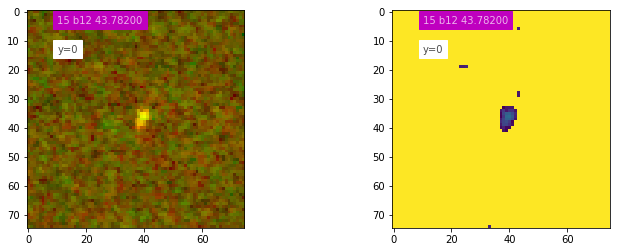

In [47]:
index = train_df.index[15]
img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
a = get_inc_angle(index, train_df)
y = get_target(index, train_df)

plt.figure(figsize=(12, 4))
ax = plt.subplot(121)
display_image(ax, img, index, 'b12', a, target=y)
ax = plt.subplot(122)
display_image(ax, segment_object(img) * img[:, :, 1], index, 'b12', a, target=y)

In [41]:
import cv2

In [42]:
mask = morpho_close(segment_object(img), ksize=3)
mm = cv2.HuMoments(cv2.moments(segment_object(img)))
mm, len(mm), mm[0][0]

(array([[  6.65020891e-03],
        [  1.74925799e-05],
        [  6.64311000e-07],
        [  1.15986200e-07],
        [ -3.16233885e-14],
        [ -4.22743113e-10],
        [ -6.04248764e-15]]), 7, 0.0066502089147092505)

In [43]:
for i in range(len(train_df)):
    index = train_df.index[i]
    img = get_image(index, train_df, bands=['nband_1', 'nband_2'])
    mask = morpho_close(segment_object(img), ksize=3)
    mm = cv2.HuMoments(cv2.moments(mask))
    train_df.loc[i, 'obj_m0'] = mm[0][0]
    train_df.loc[i, 'obj_m1'] = mm[1][0]
    train_df.loc[i, 'obj_m2'] = mm[2][0]
    train_df.loc[i, 'obj_m3'] = mm[3][0]
    train_df.loc[i, 'obj_m4'] = mm[4][0]
    train_df.loc[i, 'obj_m5'] = mm[5][0]
    train_df.loc[i, 'obj_m6'] = mm[6][0]

In [48]:
new_features = [
    'obj_m0', 'obj_m1', 'obj_m2',
    'obj_m3', 'obj_m4', 'obj_m5', 'obj_m6'
]

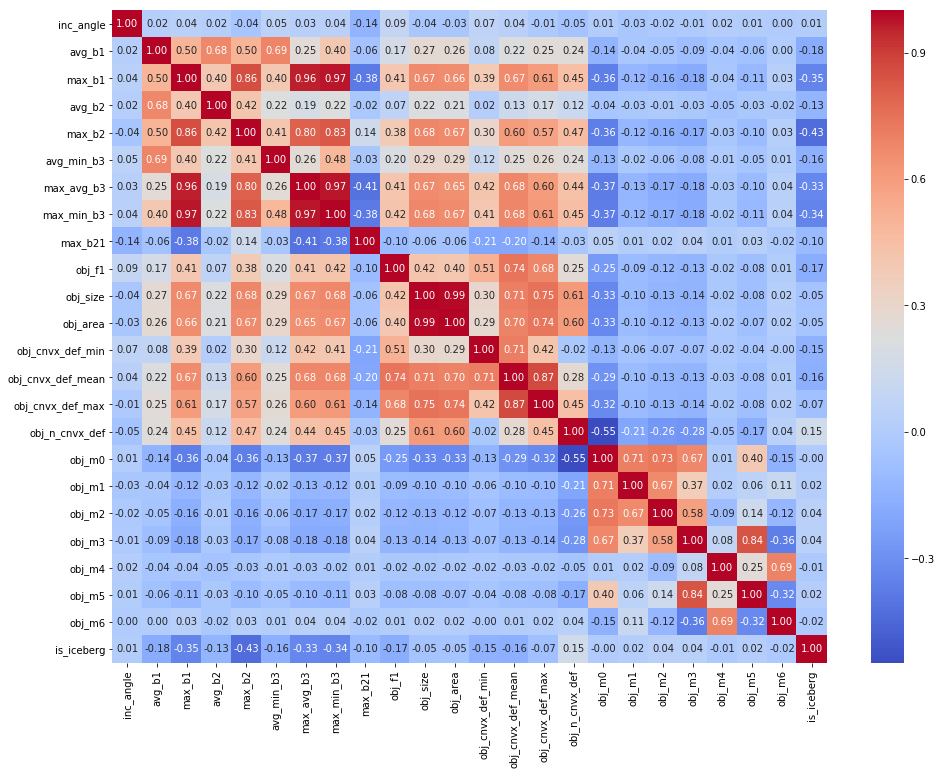

In [51]:
plt.figure(figsize=(16, 12))
g = sns.heatmap(train_df[useful_features + new_features + ['is_iceberg']].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

In [52]:
useful_features = [
    'inc_angle', 'avg_b1', 'max_b1', 'avg_b2', 'max_b2', 
    'avg_min_b3', 'max_avg_b3', 'max_min_b3',
    'max_b21', 
    'obj_f1', 'obj_size', 'obj_area',
    'obj_cnvx_def_min', 'obj_cnvx_def_mean','obj_cnvx_def_max', 'obj_n_cnvx_def',
    'obj_m2', 'obj_m3'
]

Setup features for boosting

In [53]:
features = train_df[useful_features]
labels = train_df['is_iceberg']

Training

In [54]:
import xgboost as xgb
dtrainval = xgb.DMatrix(features, label=labels)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [57]:
seed = np.random.randint(5555)
n_folds = 5

params = {
    "objective": "binary:logistic",
    "booster": "gbtree",
    "eval_metric": "logloss",
    "eta": None,
    "tree_method": 'auto',
    "max_depth": None,
    "subsample": None,
    "colsample_bytree": None,
    "silent": 1,
    "seed": None,
}

best_params = {
    'test-%s-mean' % params['eval_metric']: 1e10,
    'params': {},
    'num_boost_round': 0
}

# Search for the best parameters using CV
def generate_params():
    eta = np.random.uniform(0.005, 0.00005)
    max_depth = np.random.randint(2, 5)
    subsample = np.random.uniform(0.5, 0.95)
    colsample_bytree = np.random.uniform(0.5, 0.95)
    return eta, max_depth, subsample, colsample_bytree

In [59]:
np.random.seed(seed)
for i in range(100):

    eta, max_depth, subsample, colsample_bytree = generate_params()
    i += 1
    seed += i
    print('\n{} : XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'
          .format(i, eta, max_depth, subsample, colsample_bytree))
    num_boost_round = 35000
    early_stopping_rounds = 1000

    params['eta'] = eta
    params['max_depth'] = max_depth
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample_bytree
    params['seed'] = seed

    cvresult = xgb.cv(params, dtrain=dtrainval,
                      seed=params['seed'],
                      num_boost_round=num_boost_round,
                      early_stopping_rounds=early_stopping_rounds,
                      nfold=n_folds,
                      stratified=True,
                      verbose_eval=early_stopping_rounds)

    min_test_eval_metric_mean = cvresult['test-%s-mean' % params['eval_metric']].min()
    if best_params['test-%s-mean' % params['eval_metric']] > min_test_eval_metric_mean:
        best_params['test-%s-mean' % params['eval_metric']] = min_test_eval_metric_mean
        best_params['train-%s-mean' % params['eval_metric']] = cvresult['train-%s-mean' % params['eval_metric']].min()
        best_params['params'] = params
        best_params['num_boost_round'] = len(cvresult)
        print("Best cv result: ", cvresult.loc[cvresult.index[-1], :])
        print("Best params: ", params)


1 : XGBoost params. ETA: 0.004828448758889756, MAX_DEPTH: 4, SUBSAMPLE: 0.6549838715886136, COLSAMPLE_BY_TREE: 0.6618976297668439
[0]	train-logloss:0.690794+0.000157575	test-logloss:0.691016+0.000219489
[1000]	train-logloss:0.226952+0.00321672	test-logloss:0.321456+0.0104001
[2000]	train-logloss:0.143441+0.00276916	test-logloss:0.289725+0.0151031
[3000]	train-logloss:0.0983876+0.00249671	test-logloss:0.284069+0.0173247
[4000]	train-logloss:0.070445+0.00206743	test-logloss:0.284007+0.0195101
Best cv result:  test-logloss-mean     0.283331
test-logloss-std      0.018155
train-logloss-mean    0.088240
train-logloss-std     0.002330
Name: 3315, dtype: float64
Best params:  {'booster': 'gbtree', 'eta': 0.004828448758889756, 'max_depth': 4, 'eval_metric': 'logloss', 'colsample_bytree': 0.6618976297668439, 'subsample': 0.6549838715886136, 'tree_method': 'auto', 'silent': 1, 'seed': 5368, 'objective': 'binary:logistic'}

2 : XGBoost params. ETA: 0.002236675343133805, MAX_DEPTH: 4, SUBSAMPLE: 

KeyboardInterrupt: 

In [60]:
best_params

{'num_boost_round': 3316,
 'params': {'booster': 'gbtree',
  'colsample_bytree': 0.9486205125266844,
  'eta': 0.00460551316071894,
  'eval_metric': 'logloss',
  'max_depth': 4,
  'objective': 'binary:logistic',
  'seed': 5382,
  'silent': 1,
  'subsample': 0.7726604984020902,
  'tree_method': 'auto'},
 'test-logloss-mean': 0.28333120000000001,
 'train-logloss-mean': 0.088239800000000007}

In [61]:
# Train model
dtrain = xgb.DMatrix(features, label=labels)
model = xgb.train(best_params['params'],
                  dtrain,
                  num_boost_round=best_params['num_boost_round'],
                  evals=[(dtrain, 'train')], 
                  verbose_eval=500)

[0]	train-logloss:0.690896
[500]	train-logloss:0.319844
[1000]	train-logloss:0.233053
[1500]	train-logloss:0.184523
[2000]	train-logloss:0.151291
[2500]	train-logloss:0.126562
[3000]	train-logloss:0.106105


In [62]:
from operator import itemgetter

sorted(list(model.get_fscore().items()), key=itemgetter(1), reverse=True)

[('inc_angle', 4430),
 ('max_b2', 4006),
 ('obj_f1', 2876),
 ('obj_area', 2468),
 ('avg_b1', 2459),
 ('avg_min_b3', 2099),
 ('max_b1', 1861),
 ('max_b21', 1840),
 ('avg_b2', 1778),
 ('obj_size', 1717),
 ('max_min_b3', 1539),
 ('max_avg_b3', 1527),
 ('obj_cnvx_def_max', 1411),
 ('obj_cnvx_def_mean', 1332),
 ('obj_m2', 1319),
 ('obj_m3', 1212),
 ('obj_n_cnvx_def', 976),
 ('obj_cnvx_def_min', 518)]

### Another models

In [63]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [65]:
kfold = StratifiedKFold(n_splits=n_folds)

SVC

In [72]:
model = SVC(random_state=seed, probability=True)

In [76]:
svc_param_grid = {'kernel': ['rbf', 'sigmoid'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100, 200, 300, 1000]}

gsSVC = GridSearchCV(model, param_grid=svc_param_grid, cv=kfold, scoring="neg_log_loss", n_jobs=-1, verbose=True)

gsSVC.fit(features, labels)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:   13.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=5382, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'kernel': ['rbf', 'sigmoid'], 'gamma': [0.001, 0.01, 0.1, 1], 'C': [1, 10, 50, 100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=True)

In [78]:
model_best = gsSVMC.estimator

# Best score
gsSVC.best_score_

-0.66922948660969372

Adaboost with DT

In [87]:
dtc = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(dtc, random_state=seed)

ada_param_grid = {
    "base_estimator__criterion" : ["gini", "entropy"],
    "base_estimator__splitter" :   ["best", "random"],
    "algorithm" : ["SAMME", "SAMME.R"],
    "n_estimators" :[30, 40, 50, 75, 100, 150],
    "learning_rate":  [0.0001, 0.0005, 0.001, 0.0025, 0.005, 0.0075, 0.01, 0.1, 0.5, 1.0]
}

gsadaDTC = GridSearchCV(adaDTC,param_grid=ada_param_grid, cv=kfold, scoring="neg_log_loss", n_jobs=-1, verbose=True)

gsadaDTC.fit(features, labels)

ada_best = gsadaDTC.best_estimator_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1580 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:    4.5s finished


In [88]:
gsadaDTC.best_score_

-0.51400981719403327

ExtraTrees

In [89]:
et = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {
    "max_depth": [None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10], 
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100, 200, 300],
    "criterion": ["gini"]
}

gsExtC = GridSearchCV(et, param_grid=ex_param_grid, cv=kfold, scoring="neg_log_loss", n_jobs=-1, verbose=True)

gsExtC.fit(features, labels)

et_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   17.1s finished


-0.32399026900886435